# PREDICTING THE LIKELIHOOD OF HEART DISEASE IN INDIVIDUALS #

# 1. Business Understanding #


Cardiovascular heart disease is responsible for sudden deaths in different parts of the world. Research by WHO attributed 32 percent of global deaths to heart disease in 2019 (WHO , 2019), which is about one death in every 33 seconds (CDC, 2024) .  Every year governments and humanitarian organizations invested millions of dollars in the treatment of the disease. Between 2020-2022, the US government invested more than 252.2 billion dollars  to treat heart disease (CDC, 2024).


In developing countries, more people die of heart disease due to lack of information, and quality health care. It is projected that risk of Heart Disease will inrease between 2025 and 2050 (LANCET, 2024).

This project seeks to use machine learning models to analyse the risks and likelihood of heart disease among individuals. The findings of this project will help policy practitioners and health stakeholders to understand the leading causes of the heart attacks and recommend practical ways to reduce or minimize heart disease among populations.  


***References***


  WHO https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

  CDC (2024): Heart Disease Facts : https://www.cdc.gov/heart-disease/data-research/facts-stats/index.html

  The LANCET (2024): The burden of cardiovascular disease in Asia from 2025 to 2050: a forecast analysis for East Asia, South Asia, South-East Asia, Central Asia, and high-income Asia Pacific regions : https://www.thelancet.com/journals/lanwpc/article/PIIS2666-6065(24)00132-9/fulltext  





# 1.1 Project Objectives #

# a.  *To explore the relationship betweenn personal lifestyle and heart disease* #

  * Exercise

  * Smoking

  * Alcohol consumption

  * Stress level

  * Family history

  * Diet/Sugar consumption

  * weight


# b. *To asess the correlation between Heart disease and demographic factors* #

  * Age

  * Gender


# c. *to deterimine the impact of Physiological factors on heart disease* #

  * BMI (Body Mass Index)

  * Sleep Hours


# d. *To investigate the relationship between Heart Disease and other Medical or health conditions* #

  * Blood Pressure

  * Cholesterol level

  * Diabetes

  * High Blood Pressure

  * Low HDL (High-Density lipoprotein) cholesterol

  * High LDL Cholesterol (Low-Density Lipoprotein)

  * Trigyceride level

  * Fasting blood sugar

  * CRP level (C-Reactive Protein - which is a maker of inflammation)

  * Homocysteine level





# 2. Data Preparation and Engineering #

# 2.1. *Importing libraries* #

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import warnings # Import the warnings module
warnings.filterwarnings("ignore")


#*2.2 Loading dataset and inspecting data*#

In [104]:
df = pd.read_csv("heart_disease.csv")

In [105]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [106]:
df.tail()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes
9999,38.0,Female,128.0,193.0,Medium,Yes,Yes,Yes,25.111295,No,...,Yes,High,Medium,5.659394,High,121.0,149.0,14.387810,6.208531,Yes


In [107]:
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [108]:
df.shape

(10000, 21)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [110]:
df.isna().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


The above step shows missing a null values in different columns. Alcohol consumption has the most misisng and null values which is about 2586 values.


The next step is to replace missing and null values. For numerical columns, i will use mean to replace missing values, and use mode for object columns.

In [111]:
#Replacing null and missing values
# Separate numerical and object columns

numeric_cols = df.select_dtypes(include=np.number).columns
object_cols = df.select_dtypes(include=['object']).columns

# Fill NaN values in numerical columns with the mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill NaN values in object columns with the mode
for col in object_cols:
    df[col] = df[col].fillna(df[col].mode()[0])



In [112]:
df.isna().sum()


,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


# *2.3 Relationship betweenn personal lifestyle and heart disease* #

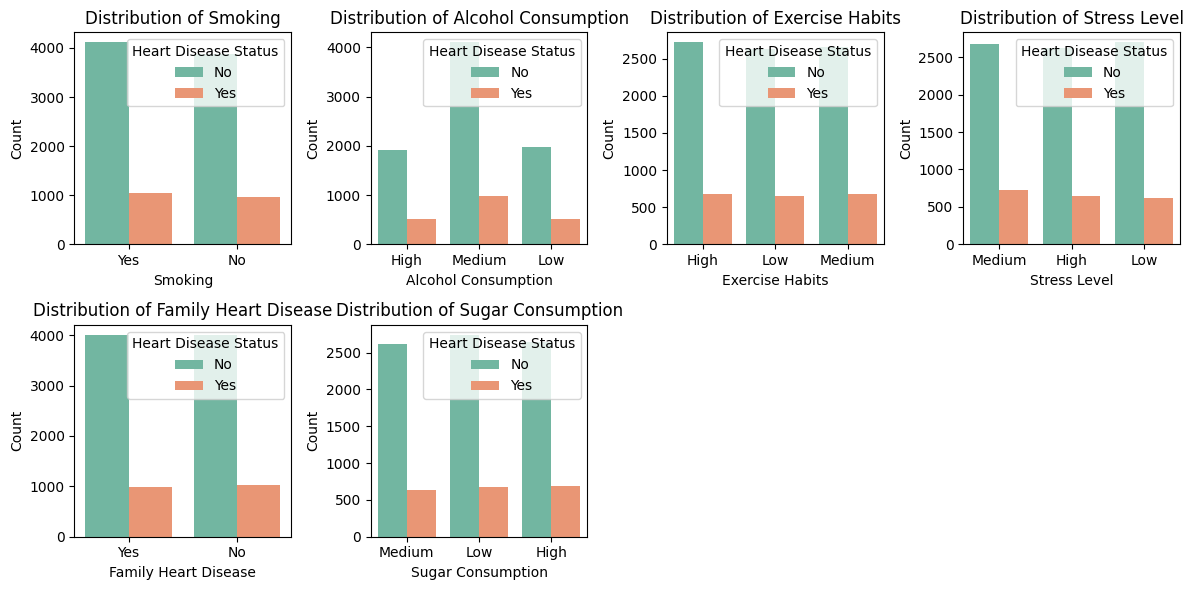

In [113]:
#Select lifestyle factors and target variable

lifestyle_factors = ["Smoking", "Alcohol Consumption", "Exercise Habits", "Stress Level", "Family Heart Disease", "Sugar Consumption"]
target = ["Heart Disease Status"]

#Visualizing lifestyle factors distribution

plt.figure(figsize=(12, 6))
for i, factor in enumerate(lifestyle_factors):
    plt.subplot(2, 4, i + 1)
    sns.countplot(data=df, x=factor, hue="Heart Disease Status", palette="Set2")
    plt.title(f"Distribution of {factor}")
    plt.xlabel(factor)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

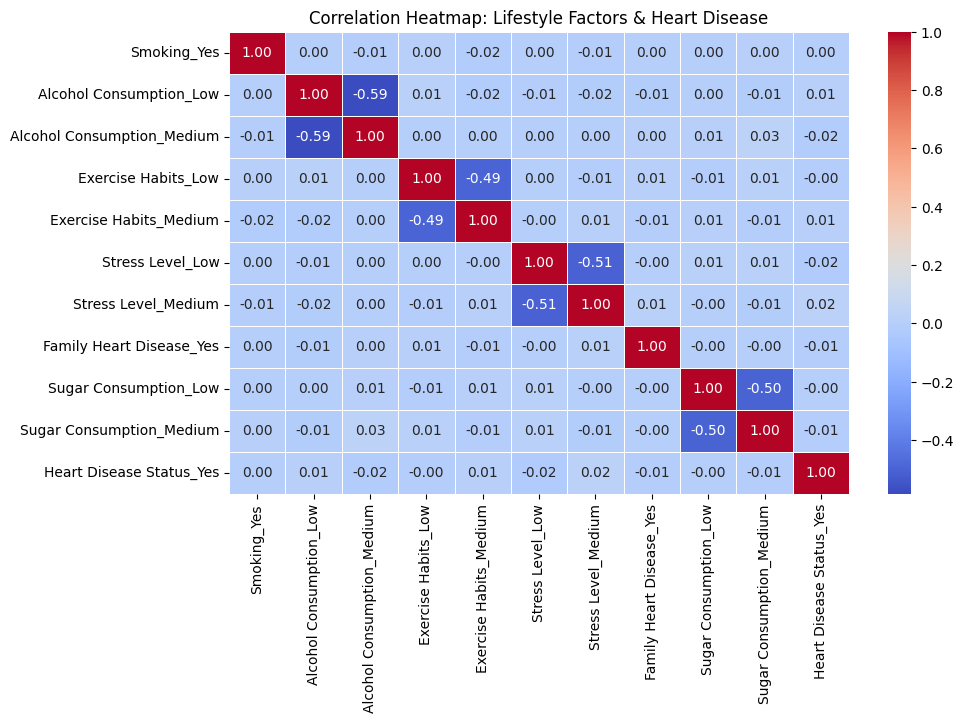

In [114]:
# Define lifestyle factors and target
lifestyle_factors = ["Smoking", "Alcohol Consumption", "Exercise Habits", "Stress Level",
                     "Family Heart Disease", "Sugar Consumption"]
target = ["Heart Disease Status"]

# Convert categorical variables to numerical (if they are not already)
df_encoded = pd.get_dummies(df[lifestyle_factors + target], drop_first=True)

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Titles and labels
plt.title("Correlation Heatmap: Lifestyle Factors & Heart Disease")
plt.show()


# *2.4 Investigating the correlation between Heart disease and demographic factors* #

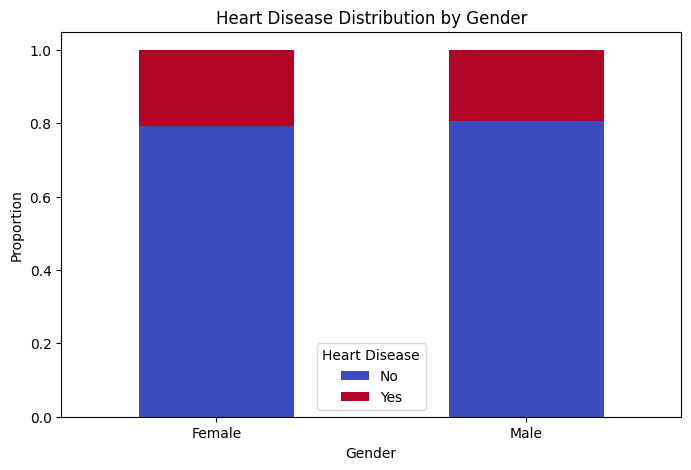

In [115]:
df.groupby("Gender")["Heart Disease Status"].value_counts(normalize=True).unstack().plot(
    kind="bar", stacked=True, figsize=(8, 5), colormap="coolwarm"
)
plt.title("Heart Disease Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Heart Disease")
plt.xticks(rotation=0)
plt.show()







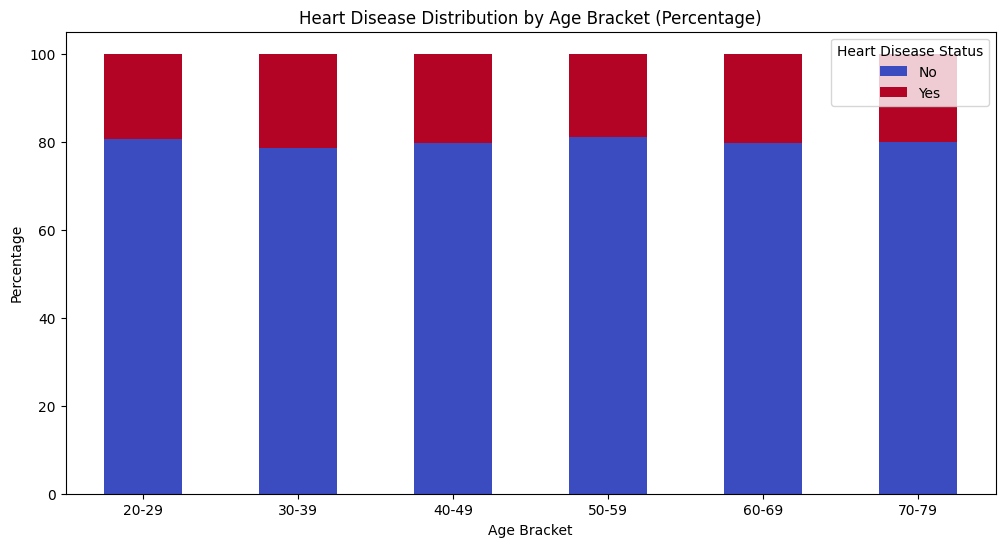

In [116]:
# Create a new column for age brackets
df["age_bracket"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

# Group by age bracket and Heart Disease Status, then calculate percentages
age_heart_disease_counts = df.groupby(["age_bracket", "Heart Disease Status"]).size().unstack()
age_heart_disease_percentages = age_heart_disease_counts.div(age_heart_disease_counts.sum(axis=1), axis=0) * 100

# Plot the percentage bar chart
age_heart_disease_percentages.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.title("Heart Disease Distribution by Age Bracket (Percentage)")
plt.xlabel("Age Bracket")
plt.ylabel("Percentage")
plt.legend(title="Heart Disease Status")
plt.xticks(rotation=0)
plt.show()


* *There is almost equal proportion of individual with heart disease for the difefrent age categories*

* *This imply age is not a factor in the detection of heart disease.*

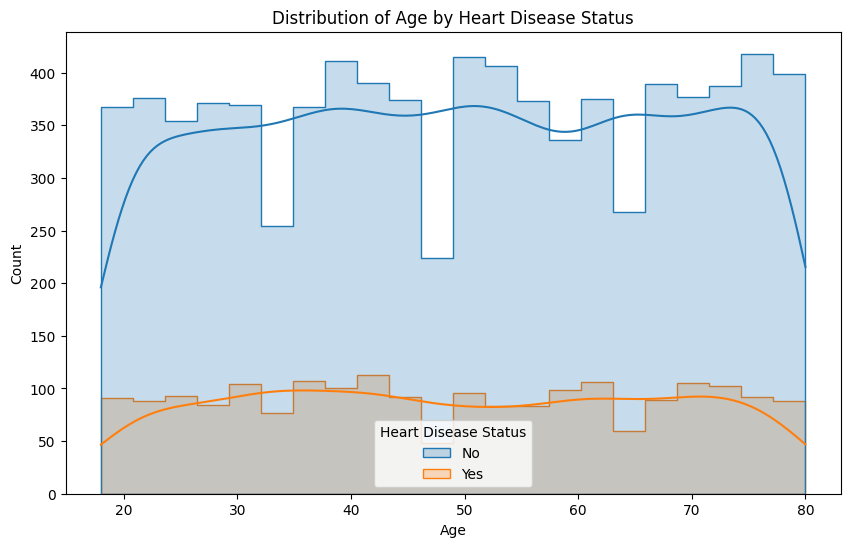

In [117]:
Demographic_factors = ["Age", "Gender"]
target = "Heart Disease Status"

# --- Visualization for Age vs Heart Disease ---
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", hue=target, element="step", kde=True)
plt.title("Distribution of Age by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

* *heart disease pervalent is low among those between 20 and 29 years*.

# *2.5 Assessing the impact of Physiological factors (BMI, sleep hours) on heart disease* #

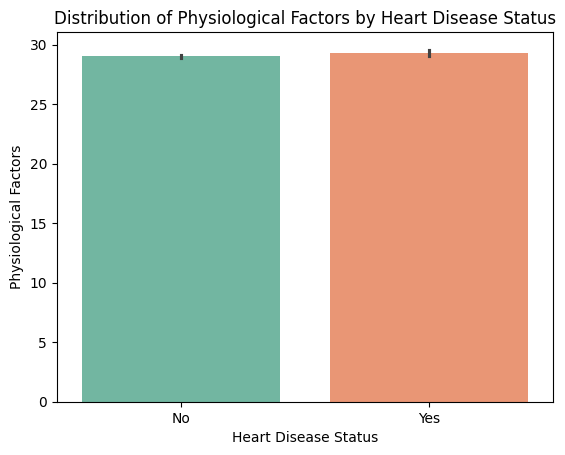

In [118]:
#Physiological factors on heart disease, eg  BMI (Body Mass Index), and Sleep Hours

physiological_factors = ["BMI", "Sleep Hours"]
target = ["Heart Disease Status"]

# Change 'barpplot' to 'barplot'
sns.barplot(data=df, x=target[0], y=physiological_factors[0], palette="Set2")  # Assuming you want to plot BMI against Heart Disease Status

plt.title("Distribution of Physiological Factors by Heart Disease Status")
plt.xlabel("Heart Disease Status")
plt.ylabel("Physiological Factors")
plt.show()


* *The physiological factors have little impact on the detection of heart disease*


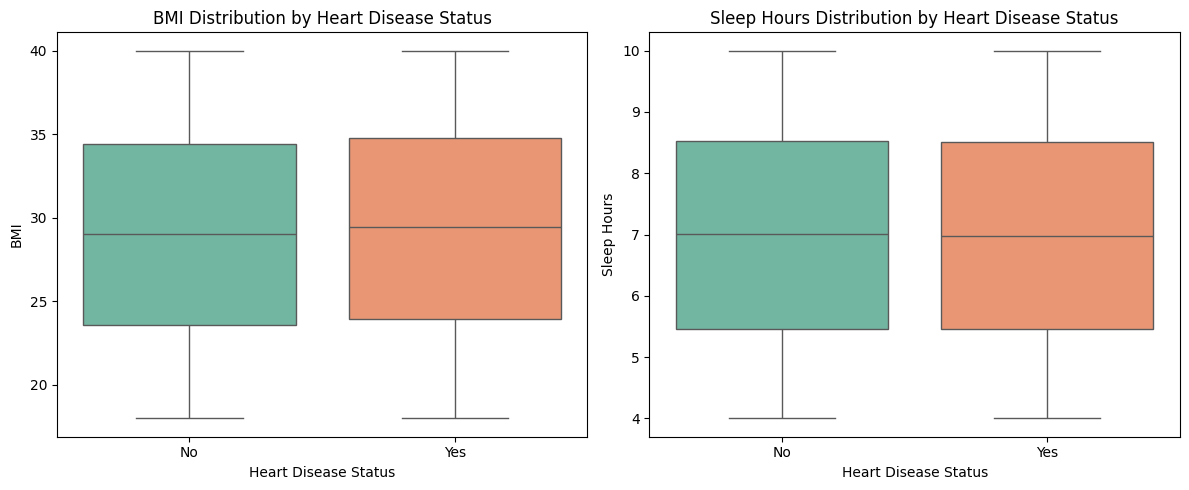

In [119]:

# Define physiological factors
physiological_factors = ["BMI", "Sleep Hours"]
target = "Heart Disease Status"

# Set figure size
plt.figure(figsize=(12, 5))

# Loop through each physiological factor
for i, factor in enumerate(physiological_factors, 1):
    plt.subplot(1, 2, i)  # Create subplots for side-by-side comparison
    sns.boxplot(data=df, x=target, y=factor, palette="Set2")

    plt.title(f"{factor} Distribution by Heart Disease Status")
    plt.xlabel("Heart Disease Status")
    plt.ylabel(factor)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



* *BMI does not show a strong difference between groups, suggesting that BMI alone might not be a clear indicator of heart disease risk*.

* *Lower sleep hours might be more prevalent among those with heart disease, hinting at a possible relationship between sleep and heart health*.

* *Further statistical tests (e.g., t-tests or ANOVA) would be needed to confirm if these differences are statistically significant*.

# *2.6 Investigating the relationship between Heart Disease and other Medical or health conditions* #

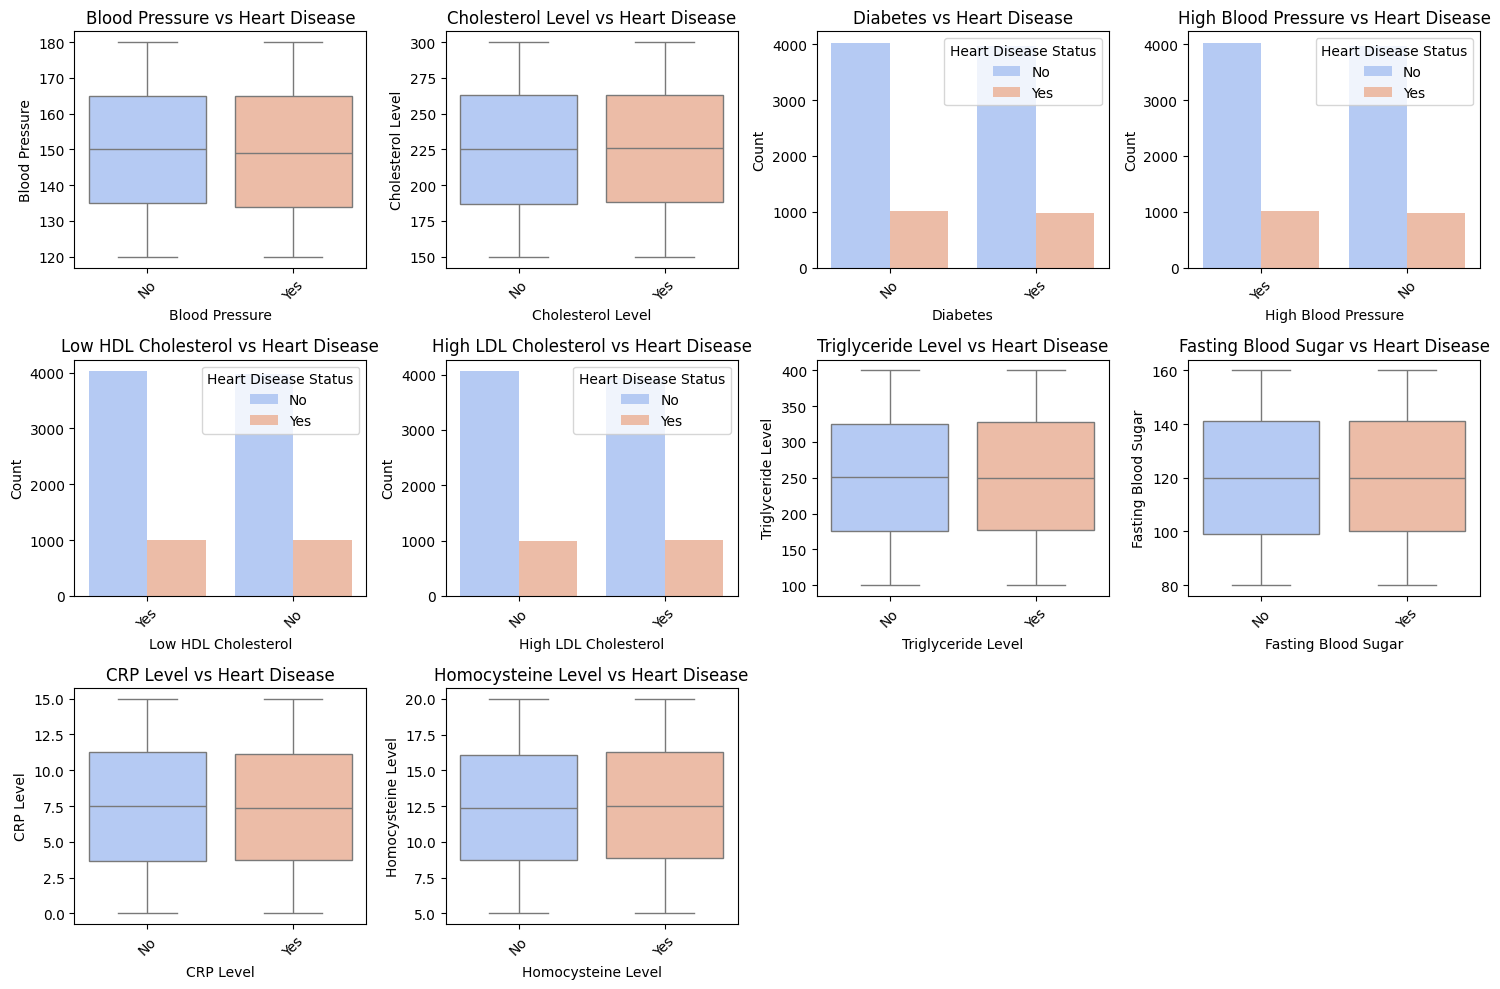

In [120]:
# Define key health indicators
health_factors = [
    "Blood Pressure", "Cholesterol Level", "Diabetes", "High Blood Pressure",
    "Low HDL Cholesterol", "High LDL Cholesterol", "Triglyceride Level",
    "Fasting Blood Sugar", "CRP Level", "Homocysteine Level"
]

target = "Heart Disease Status"

# Set figure size
plt.figure(figsize=(15, 10))

# Loop through factors and create visualizations
for i, factor in enumerate(health_factors, 1):
    plt.subplot(3, 4, i)  # Create subplots (3 rows, 4 columns)

    # Check if the factor is categorical or continuous
    if df[factor].nunique() <= 10:
        # If the factor has 10 or fewer unique values, use a bar chart
        sns.countplot(data=df, x=factor, hue=target, palette="coolwarm")
    else:
        # If the factor is continuous, use a boxplot
        sns.boxplot(data=df, x=target, y=factor, palette="coolwarm")

    plt.title(f"{factor} vs Heart Disease")
    plt.xlabel(factor)
    plt.ylabel("Count" if df[factor].nunique() <= 10 else factor)
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


#The boxplots compare cardiovascular risk factors between individuals with and without heart disease.

* *Blood pressure, cholesterol level, triglyceride level, fasting blood sugar, CRP level, and homocysteine level have similar medians across both groups*.


* *Slight variations in the interquartile range (IQR) suggest differences in variability between groups*.


* *Cholesterol and triglyceride levels have a wider spread in individuals with heart disease, indicating greater variation*.


* *Fasting blood sugar levels are slightly higher in those with heart disease, aligning with diabetes as a known risk factor*.


* *CRP and homocysteine levels show slight shifts but remain largely comparable between groups*.


* *Categorical variables such as diabetes, high blood pressure, low HDL cholesterol, and high LDL cholesterol show higher proportions in individuals with heart disease*.


* *A larger proportion of individuals with heart disease have diabetes, high blood pressure, and high LDL cholesterol, suggesting a strong association with heart disease prevalence*.


* *Monitoring these variables could be crucial in predicting heart disease risk*.


* *Further statistical tests, such as t-tests or chi-square tests, are necessary to confirm the significance of these differences*.

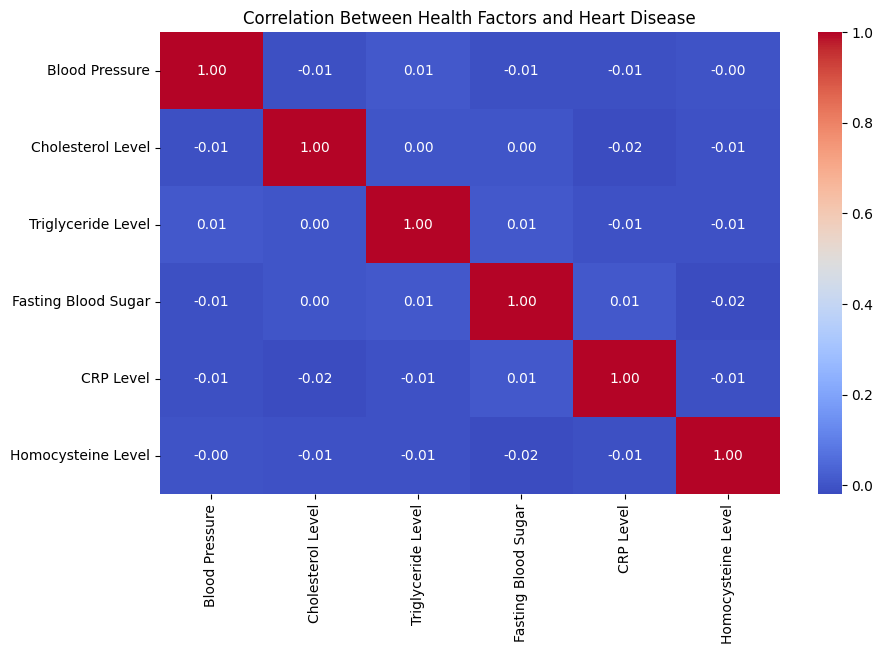

In [121]:
#heatmap correlation between health factors and heart disease

plt.figure(figsize=(10, 6))

# Select only numeric columns for correlation calculation
numeric_df = df[health_factors + [target]].select_dtypes(include=np.number)

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Health Factors and Heart Disease")
plt.show()


There is generally a weak correlation between the different variables

# 2.7 Statistical Inferences#

In [122]:
# T-Test: Comparing Blood Pressure between Heart Disease (Yes) and No Heart Disease (No) groups
heart_disease_yes = df[df["Heart Disease Status"] == "Yes"]["Blood Pressure"]
heart_disease_no = df[df["Heart Disease Status"] == "No"]["Blood Pressure"]

t_stat, p_value = stats.ttest_ind(heart_disease_yes, heart_disease_no, nan_policy='omit')

print("T-Test Results: Blood Pressure vs Heart Disease Status")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("The difference in Blood Pressure between groups is statistically significant.")
else:
    print("No significant difference in Blood Pressure between groups.")

# ANOVA: Comparing Cholesterol Level across different Exercise Habits categories
exercise_groups = [df[df["Exercise Habits"] == category]["Cholesterol Level"].dropna()
                   for category in df["Exercise Habits"].unique()]

anova_stat, anova_p_value = stats.f_oneway(*exercise_groups)

print("\nANOVA Results: Cholesterol Level vs Exercise Habits")
print(f"F-Statistic: {anova_stat:.4f}")
print(f"P-Value: {anova_p_value:.4f}")

if anova_p_value < 0.05:
    print("There is a statistically significant difference in Cholesterol Level among Exercise Habit groups.")
else:
    print("No significant difference in Cholesterol Level among Exercise Habit groups.")

T-Test Results: Blood Pressure vs Heart Disease Status
T-Statistic: -1.3877
P-Value: 0.1653
No significant difference in Blood Pressure between groups.

ANOVA Results: Cholesterol Level vs Exercise Habits
F-Statistic: 0.1725
P-Value: 0.8416
No significant difference in Cholesterol Level among Exercise Habit groups.


# *3. Machine Learning Model Engineering*#

This step will involve ;


*   Feature egineering

*   Training the models

*   Evaluating performance of test data

*   Selecting the best Performing model





In [123]:
# Define and select variable for X and Y for target variable
X = df.drop("Heart Disease Status", axis=1)
y = df["Heart Disease Status"]


In [124]:
#Training and testing the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [125]:
#Checking the shape of the trained and test data
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(8000, 21)
(2000, 21)
(8000,)
(2000,)


# 3.1 Testing Machine Learning Models#

#*3.1.1 Logistic Regression Model*

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# 1. Drop 'age_bracket' column
df = df.drop('age_bracket', axis=1)  # Remove the age_bracket column

# 2. Define features (X) and target (y)
X = df.drop("Heart Disease Status", axis=1)
y = df["Heart Disease Status"]

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Preprocessing: One-Hot Encoding for categorical features
categorical_features = ['Gender', 'Smoking', 'Alcohol Consumption', 'Exercise Habits',
                        'Stress Level', 'Family Heart Disease', 'Sugar Consumption']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X.select_dtypes(exclude=['object']).columns.tolist()),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

# 5. Apply preprocessing to training and testing data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# 6. Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
logreg_model.fit(X_train_encoded, y_train)

# 7. Make predictions on the test set
y_pred = logreg_model.predict(X_test_encoded)

# 8. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8065
Classification Report:
               precision    recall  f1-score   support

          No       0.81      1.00      0.89      1613
         Yes       0.00      0.00      0.00       387

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000

Confusion Matrix:
 [[1613    0]
 [ 387    0]]


* *Accuracy: 0.8065: This means that the model correctly predicted the target variable for approximately 80.65% of the instances in the test set. Accuracy is the ratio of correctly predicted instances to the total instances*.



* *The model performs well in predicting the "No" class but fails to predict the "Yes" class. This could be due to class imbalance or insufficient features to distinguish between the classes.*.

#  *3.1.2 Random Forest Classifier Model*

In [127]:
# Randomforest

from sklearn.ensemble import RandomForestClassifier

#Train RandomForest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)

#Make predictions on the test set
y_pred = rf_model.predict(X_test_encoded)

#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))









Accuracy: 0.8065
Classification Report:
               precision    recall  f1-score   support

          No       0.81      1.00      0.89      1613
         Yes       0.00      0.00      0.00       387

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000

